<a href="https://colab.research.google.com/github/rodespdi/PDA2526/blob/main/Entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este código te permite subir dos imágenes y luego calcula y visualiza su **entropía local** para comparar su nivel de complejidad visual o textura.

En esencia, te pide dos imágenes y te muestra, para cada una, qué zonas son "suaves y simples" y qué zonas son "complejas y detalladas".

***
### ¿Qué es la Entropía en una Imagen?
Imagina que miras una foto. Algunas partes son muy uniformes, como un cielo azul sin nubes. Otras partes están llenas de detalles, como la hierba de un campo o la textura de una pared de ladrillos.

La **entropía local** es una medida matemática que cuantifica esa **complejidad o "desorden"** en pequeñas áreas de la imagen.
* **Baja Entropía**: Corresponde a zonas suaves, uniformes y predecibles (el cielo, una pared lisa).
* **Alta Entropía**: Corresponde a zonas con mucha textura, detalles y variaciones impredecibles (la hierba, el follaje de un árbol, el ruido en una foto).

***
### Funcionamiento Paso a Paso
El código sigue una secuencia lógica y clara para cada una de las dos imágenes que le proporcionas:

1.  **Petición y Carga de Archivos**
    * El programa te pedirá que subas la primera imagen. Se abrirá un cuadro de diálogo para que selecciones un archivo de tu ordenador.
    * Repetirá el proceso para una segunda imagen.

2.  **Procesamiento de cada Imagen**
    * **Lectura**: Lee el archivo de imagen que has subido.
    * **Conversión a Escala de Grises**: La entropía se basa en los niveles de brillo, no en el color. Por eso, si la imagen es a color, la convierte a blanco y negro. Si ya lo es, la usa directamente.
    * **Cálculo de la Entropía Local**: Este es el paso clave. El código recorre la imagen píxel por píxel. Para cada píxel, analiza una pequeña **área circular a su alrededor** (definida por `disk(5)`) y calcula la entropía de esa zona. El resultado es una nueva imagen, llamada "imagen de entropía", donde el valor de cada píxel representa la complejidad de esa región en la imagen original.

3.  **Visualización de los Resultados**
    * El programa crea una **cuadrícula de 2x2** para mostrar todo de forma ordenada.
    * En la **fila de arriba**, muestra las dos imágenes originales que subiste.
    * En la **fila de abajo**, muestra las dos "imágenes de entropía" correspondientes. En estas imágenes de resultado, las **zonas más brillantes** indican **alta entropía** (más textura/detalle), mientras que las **zonas oscuras** indican **baja entropía** (superficies lisas).

***
### ¿Para Qué Sirve?
Esta técnica es muy útil en visión por computadora para tareas como:
* **Análisis de texturas**: Diferenciar materiales como tela, madera o hierba.
* **Detección de características**: Encontrar zonas de interés en una imagen que no son necesariamente bordes, sino regiones ricas en información.
* **Segmentación de imágenes**: Separar objetos o regiones basándose en la complejidad de su superficie.

Por favor, sube la primera imagen:


Saving alta_entropía.png to alta_entropía.png

Por favor, sube la segunda imagen:


Saving baja_entropía.png to baja_entropía.png


/tmp/ipython-input-379749872.py:79: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  upload_and_process_images()
/tmp/ipython-input-379749872.py:79: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  upload_and_process_images()


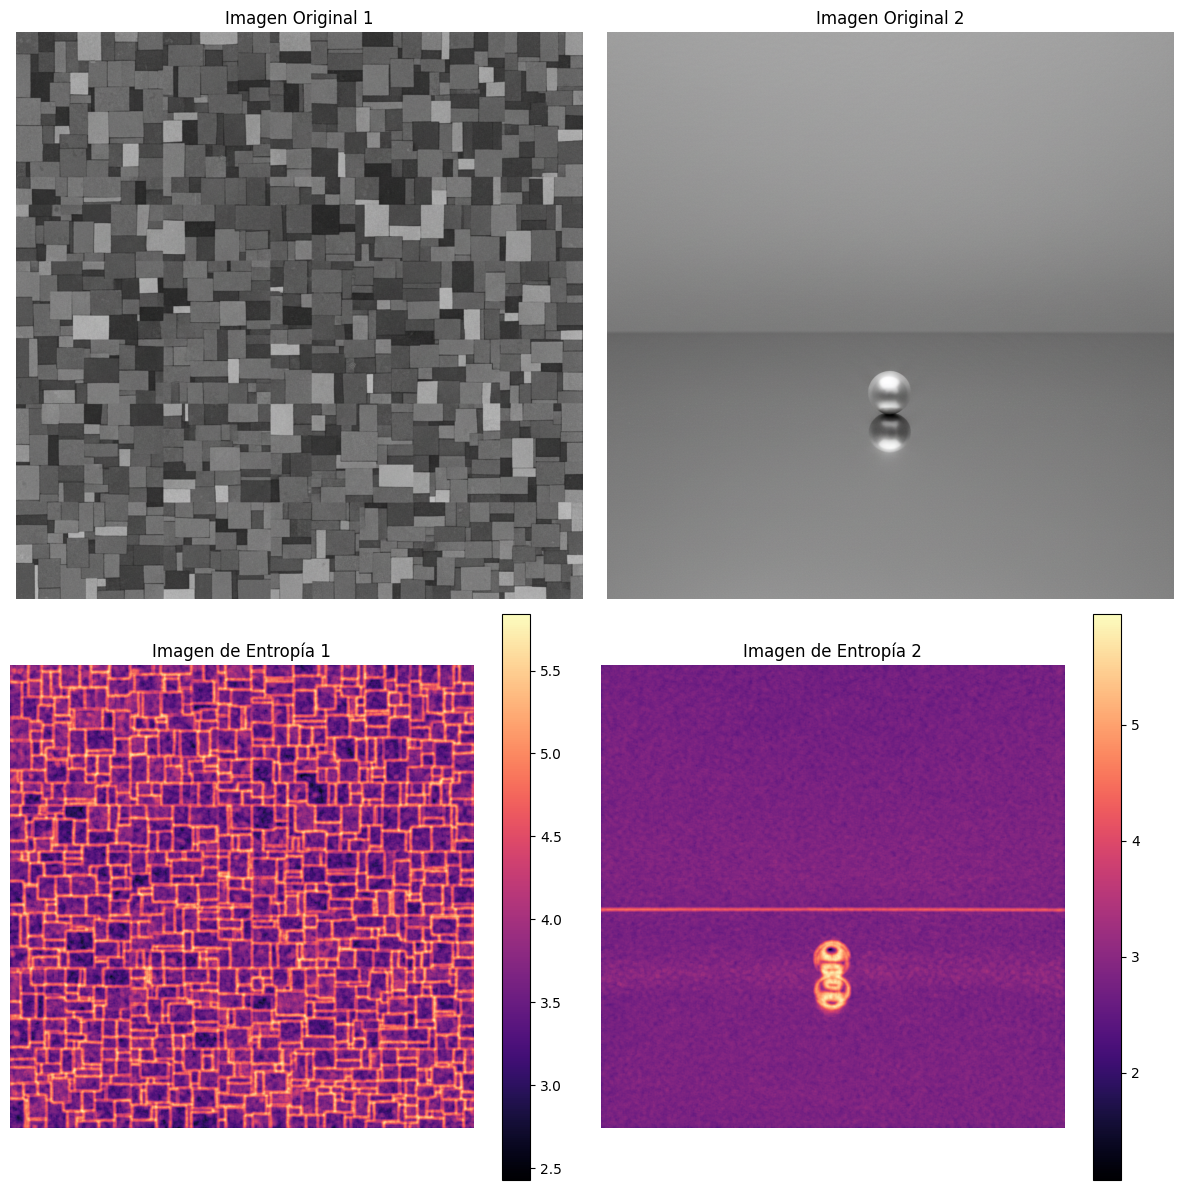

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2gray
from skimage import io

def upload_and_process_images():
    """
    Handles file uploading, calculates local entropy, and displays the images.
    """
    print("Por favor, sube la primera imagen:")
    uploaded = files.upload()
    if not uploaded:
        print("No se seleccionó ningún archivo. Inténtalo de nuevo.")
        return

    file_path1 = list(uploaded.keys())[0]

    print("\nPor favor, sube la segunda imagen:")
    uploaded = files.upload()
    if not uploaded:
        print("No se seleccionó ningún archivo para la segunda imagen. Inténtalo de nuevo.")
        return

    file_path2 = list(uploaded.keys())[0]

    # --- Procesar la primera imagen ---
    # Leer la imagen
    img1_color = io.imread(file_path1)
    # Convertir a escala de grises para el cálculo de entropía
    if img1_color.ndim == 3: # Si es una imagen a color
        img1_gray = rgb2gray(img1_color)
    else: # Si ya está en escala de grises
        img1_gray = img1_color

    # Calcular la entropía local. Se usa un disco de 5 píxeles como vecindad.
    entropy_img1 = entropy(img1_gray, disk(5))

    # --- Procesar la segunda imagen ---
    img2_color = io.imread(file_path2)
    if img2_color.ndim == 3:
        img2_gray = rgb2gray(img2_color)
    else:
        img2_gray = img2_color

    entropy_img2 = entropy(img2_gray, disk(5))

    # --- Mostrar los resultados ---
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Primera imagen y su entropía
    axes[0, 0].imshow(img1_color)
    axes[0, 0].set_title('Imagen Original 1')
    axes[0, 0].axis('off')

    im1 = axes[1, 0].imshow(entropy_img1, cmap='magma')
    axes[1, 0].set_title('Imagen de Entropía 1')
    axes[1, 0].axis('off')
    fig.colorbar(im1, ax=axes[1, 0], orientation='vertical')


    # Segunda imagen y su entropía
    axes[0, 1].imshow(img2_color)
    axes[0, 1].set_title('Imagen Original 2')
    axes[0, 1].axis('off')

    im2 = axes[1, 1].imshow(entropy_img2, cmap='magma')
    axes[1, 1].set_title('Imagen de Entropía 2')
    axes[1, 1].axis('off')
    fig.colorbar(im2, ax=axes[1, 1], orientation='vertical')

    plt.tight_layout()
    plt.show()

# Ejecutar la función
upload_and_process_images()

Entropía de la imagen de Baja Entropía: 8.00 bits
Entropía de la imagen de Alta Entropía: 8.00 bits


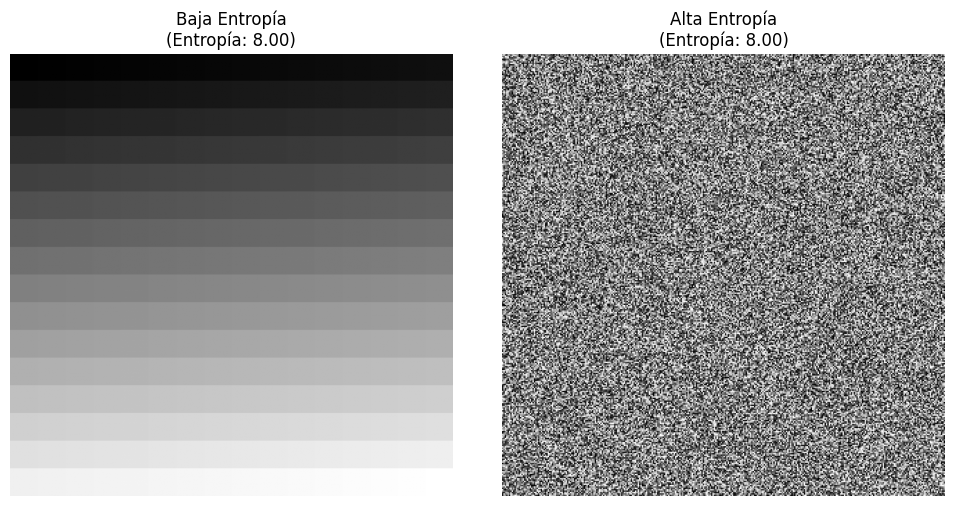

In [1]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Función para calcular la entropía de Shannon de una imagen
def calcular_entropia(imagen):
    # Convertir la imagen a un array de numpy
    array_imagen = np.array(imagen.convert('L')) # Convertir a escala de grises para el cálculo

    # Obtener el histograma de la imagen
    histograma, _ = np.histogram(array_imagen, bins=256, range=(0, 256), density=True)

    # Calcular la entropía usando la fórmula de Shannon: H = -sum(p * log2(p))
    # Se añade un pequeño valor para evitar log(0)
    entropia = -np.sum(histograma * np.log2(histograma + 1e-10))

    return entropia

# --- Creación de imágenes de demostración ---

# 1. Imagen de Baja Entropía (degradado suave)
img_baja_entropia = Image.fromarray(np.arange(256).reshape(16, 16).repeat(20, axis=0).repeat(20, axis=1).astype(np.uint8))

# 2. Imagen de Alta Entropía (ruido aleatorio)
np.random.seed(42) # Para reproducibilidad
img_alta_entropia = Image.fromarray(np.random.randint(0, 256, (320, 320), dtype=np.uint8))

# --- Cálculo de entropía ---
entropia_baja = calcular_entropia(img_baja_entropia)
entropia_alta = calcular_entropia(img_alta_entropia)

print(f"Entropía de la imagen de Baja Entropía: {entropia_baja:.2f} bits")
print(f"Entropía de la imagen de Alta Entropía: {entropia_alta:.2f} bits")

# --- Visualización de las imágenes ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_baja_entropia, cmap='gray')
axes[0].set_title(f'Baja Entropía\n(Entropía: {entropia_baja:.2f})')
axes[0].axis('off')

axes[1].imshow(img_alta_entropia, cmap='gray')
axes[1].set_title(f'Alta Entropía\n(Entropía: {entropia_alta:.2f})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [2]:
# Importar librerías para la gestión de archivos
import os

# Nombres de archivo para las imágenes
nombre_baja = 'imagen_baja_entropia.png'
nombre_alta = 'imagen_alta_entropia.png'

# Guardar las imágenes en formato PNG
img_baja_entropia.save(nombre_baja)
img_alta_entropia.save(nombre_alta)

# Obtener los tamaños de los archivos en bytes
tamano_baja = os.path.getsize(nombre_baja)
tamano_alta = os.path.getsize(nombre_alta)

print(f"Tamaño del archivo de Baja Entropía: {tamano_baja} bytes")
print(f"Tamaño del archivo de Alta Entropía: {tamano_alta} bytes")

# Opcional: limpiar los archivos temporales
os.remove(nombre_baja)
os.remove(nombre_alta)

Tamaño del archivo de Baja Entropía: 771 bytes
Tamaño del archivo de Alta Entropía: 102885 bytes


### ¿Por qué tienen la misma entropía calculada si visualmente se observa más desesorden en una imagen que en otra?

La razón es que existe una distinción clave en el análisis de imágenes: la diferencia entre la **distribución de los píxeles** y su **organización espacial**.

La respuesta corta es que el cálculo de la **entropía global** de una imagen se basa únicamente en su **histograma** (la frecuencia de cada nivel de gris), ignorando por completo la **disposición** de los píxeles.

---
### Analogía: Un Mismo Inventario, Dos Construcciones Diferentes

Imagina que tienes una caja con 100 ladrillos LEGO: 50 son rojos y 50 son azules.

* **Imagen 1**: Construyes un muro con la mitad izquierda completamente roja y la mitad derecha completamente azul.
* **Imagen 2**: Construyes un muro con un patrón de ajedrez, alternando ladrillos rojos y azules.

Ambos muros se ven **radicalmente distintos**. Uno es ordenado y separado, el otro es complejo y texturizado. Sin embargo, el **inventario de ladrillos** (el histograma) es idéntico: 50 rojos y 50 azules.

La entropía global es como analizar solo el inventario. Al ver que ambas "imágenes" tienen la misma proporción de ladrillos, concluye que la "imprevisibilidad" de encontrar un color determinado es la misma en ambos casos. **No le importa cómo están ordenados los ladrillos, solo cuántos hay de cada color.**

---
### ¿Cómo Funciona el Cálculo?

1.  **Creación del Histograma**: El primer paso para calcular la entropía de una imagen es generar su histograma. Un histograma es simplemente un gráfico que cuenta cuántos píxeles hay para cada nivel de intensidad (normalmente de 0 para negro a 255 para blanco).

2.  **Cálculo de Probabilidades**: A partir del histograma, se calcula la probabilidad de que un píxel elegido al azar tenga un cierto nivel de gris. Por ejemplo, si el 20% de los píxeles de una imagen son negros (valor 0), la probabilidad de encontrar un píxel negro es de 0.2.

3.  **Aplicación de la Fórmula**: La fórmula de la entropía de Shannon, $H = -\sum p(i) \log_2 p(i)$, se alimenta exclusivamente de estas probabilidades. La fórmula no recibe ninguna información sobre la posición $(x, y)$ de los píxeles.

Por lo tanto, si dos imágenes visualmente diferentes tienen por casualidad el mismo histograma, su entropía global calculada será **exactamente la misma**.

---
### La Diferencia Clave: Entropía Global vs. Entropía Local

Aquí es donde el código que analizaste anteriormente se vuelve relevante.

* **Entropía Global**: Es un **único número** que describe la complejidad de la imagen en su conjunto, basándose solo en el histograma. Es útil para entender la distribución general de los tonos.

* **Entropía Local**: Es una **nueva imagen** donde cada píxel representa la complejidad de su pequeña vecindad. Esta medida sí depende de la organización espacial y es excelente para analizar texturas.

Si aplicaras el cálculo de **entropía local** a las dos imágenes del ejemplo (la de bloques de color y la de ajedrez), los resultados serían muy diferentes. La imagen de bloques tendría una entropía local muy baja en casi todas partes (excepto en el borde central), mientras que la imagen de ajedrez tendría una entropía local muy alta en toda su extensión.

Las imágenes son diferentes en su complejidad. El tema es que la "entropía global" es una herramienta que no está diseñada para capturar ese tipo de diferencia estructural, solo la estadística general de sus componentes.